In [10]:
import time
import matplotlib.pyplot as plt
import random
from scipy import stats
import math
import numpy as np

In [11]:
#Q1:Complete the implementation of the FFT algorithm we started in class.
def fft(P, X, n):
    if n == 1:  # Base Case
        return [P[0]]
    
    m = n//2
    p_odd = [P[i] for i in range(1,n,2)]
    p_even = [P[i] for i in range(0,n,2)]
    
    w_squared = [X[i]*X[i] for i in range(0, m)]

    # finding the FFT result of even and odd coefficients
    sol_even = fft(p_even, w_squared, m)
    sol_odd = fft(p_odd, w_squared, m)
    
    first = [sol_even[i] + X[i] * sol_odd[i] for i in range(0,m)]
    second = [sol_even[i] - X[i] * sol_odd[i] for i in range(0,m)]
    return (first+second)

In [12]:
# Q2(a):function to compute the omega list using trigonometry
def omega(n):  
  size = n
  howMany = 2*size
  #using trig
  angleList = [i*2*math.pi/howMany for i in range(0, howMany)]
  omegaList = [complex(math.cos(angle), math.sin(angle)) for angle in angleList]
  return omegaList 

In [13]:
#Function to generate omega inverse
def omega_inverse(w):
  w_in = [0]*len(w)
  for i in range(len(w)):
    w_in[i] = complex(w[i].real, -w[i].imag)
  return w_in

In [14]:
#Q2(b): use fft to multiply two polynomials.

def fft_poly_mult(P,Q,n):
    # creating the list of omega and inverse omega
    w = omega(n)
    w_in = omega_inverse(w)
    
    #padding P and Q with zeros
    P += [0]*n
    Q += [0]*n
    # Computing FFT of P and Q
    SolP = fft(P, w, 2*n)
    SolQ = fft(Q, w, 2*n)

    # Interpolating the value of PQ from P and Q
    SolPQ = [0] *2* n
    for i in range(0, 2*n):
        SolPQ[i] = SolP[i] * SolQ[i]

    # Getting back the value of PQ from its FFT
    PQ = fft(SolPQ, w_in, 2*n)
    
    res = [round(value.real / len(SolP)) for value in PQ]
    end = time.time()
    return res[:len(P) + len(Q)]
    

In [20]:
#Q3,Q4 Testing all the four methods with integers and then floats for checking the same output for random problem sets from 2^1 to 2^11.
# for fft the values are rounded so it does not compute decimals where as the other algorithms do.
def problem_generator():
  print("Integers ")
  problemSizes = [2**i for i in range(1, 11)]
  for coeff in problemSizes:
    print("problem size: ",coeff)
    P = [0]*coeff
    Q = [0]*coeff 
    for j in range(coeff):
      P[j] = random.randint(0, 50)
      Q[j] = random.randint(0, 50)
    print("P: ",P)
    print("Q: ",Q)
    x = polyMultSchool(P,Q,coeff)
    y = polyMult4(P,Q,coeff)
    z = polyMult3(P,Q,coeff)
    ff = fft_poly_mult(P,Q,coeff)
    print("PQ old school ",x)
    print("PQ 4 multiplications ",y)
    print("PQ 3 multiplications ",z)
    print("PQ fft multiplications ",ff)
    print("\n")
  
  print("Flaots: ")
  problemSizes = [2**i for i in range(1, 11)]
  for coeff in problemSizes:
    print("problem size: ",coeff)
    P = [0]*coeff
    Q = [0]*coeff 
    for j in range(coeff):
      P[j] = random.uniform(0, 50)
      Q[j] = random.uniform(0, 50)
    print("P: ",P)
    print("Q: ",Q)
    x = polyMultSchool(P,Q,coeff)
    y = polyMult4(P,Q,coeff)
    z = polyMult3(P,Q,coeff)
    ff = fft_poly_mult(P,Q,coeff)
    print("PQ old school ",x)
    print("PQ 4 multiplications ",y)
    print("PQ 3 multiplications ",z)
    print("PQ fft multiplications ",ff)
    print("\n")
    
problem_generator()


Integers 
problem size:  2
P:  [50, 0]
Q:  [12, 18]
PQ old school  [600, 900, 0, 0]
PQ 4 multiplications  [600, 900, 0, 0]
PQ 3 multiplications  [600, 900, 0, 0]
PQ fft multiplications  [600, 900, 0, 0]


problem size:  4
P:  [14, 20, 26, 43]
Q:  [47, 25, 26, 41]
PQ old school  [658, 1290, 2086, 3765, 2571, 2184, 1763, 0]
PQ 4 multiplications  [658, 1290, 2086, 3765, 2571, 2184, 1763, 0]
PQ 3 multiplications  [658, 1290, 2086, 3765, 2571, 2184, 1763, 0]
PQ fft multiplications  [658, 1290, 2086, 3765, 2571, 2184, 1763, 0]


problem size:  8
P:  [49, 11, 24, 39, 6, 9, 34, 28]
Q:  [29, 4, 20, 19, 10, 2, 42, 11]
PQ old school  [1421, 515, 1720, 2378, 1509, 1729, 4203, 2681, 2230, 3210, 1571, 792, 1583, 1550, 308, 0]
PQ 4 multiplications  [1421, 515, 1720, 2378, 1509, 1729, 4203, 2681, 2230, 3210, 1571, 792, 1583, 1550, 308, 0]
PQ 3 multiplications  [1421, 515, 1720, 2378, 1509, 1729, 4203, 2681, 2230, 3210, 1571, 792, 1583, 1550, 308, 0]
PQ fft multiplications  [1421, 515, 1720, 2378, 1509

Function polyMultSchool time = 0.000405 n ^ 1.896
Function polyMult4 time = 0.001515 n ^ 1.938
Function polyMult3 time = 0.002933 n ^ 1.540
Function fft_poly_mult time = 0.034691 n ^ 1.014


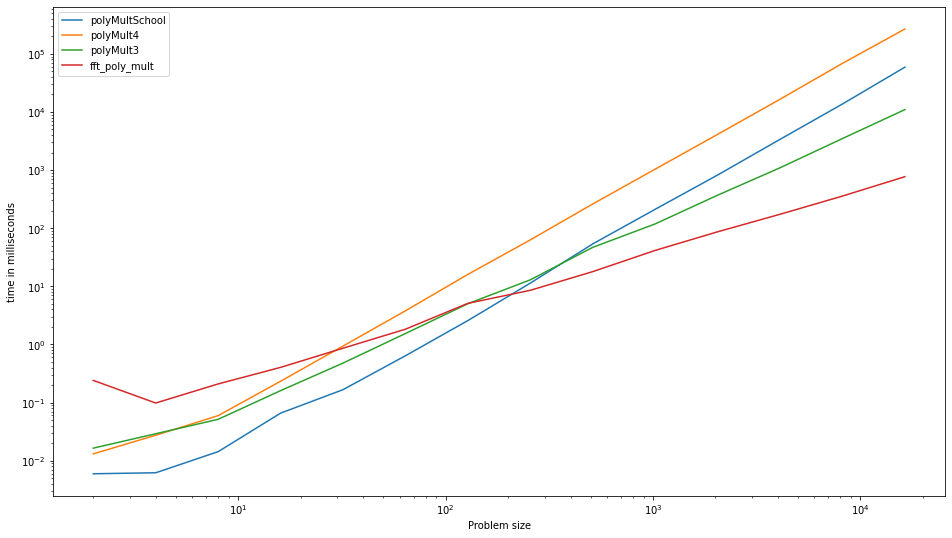

In [ ]:
#Q5: Graphs for comparing all the four functions.FFT is nearly linear
problemSizes = [2**i for i in range(1, 15)]
problemList = [(i, ([random.randint(0,100) for j in range(0,i)], 
                    [random.randint(0,100) for j in range(0,i)], i)) for i in problemSizes]
avgtimeCompareFunctions(problemList, [polyMultSchool, polyMult4,polyMult3,fft_poly_mult], init = None, fit = 'polynomial')

The fft algorithm runs almost linear. It looks slower than the other algorithms for very small problem size which as per the discussion board is expected.

Start Time :  Fri Oct 16 14:46:40 2020
Function fft_poly_mult time = 0.033098 n ^ 1.034


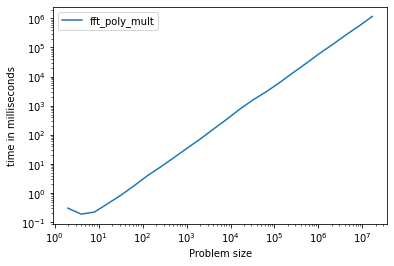

End Time :  Fri Oct 16 15:25:05 2020


In [15]:
#Question 6: Time just the FFT approach. What is the largest problem can you solve?
#Solution: I ran the problem from 2 to 2^24 (16777216)
print("Start Time : ",time.ctime())
problemSizes = [2**i for i in range(1, 25)]
problemList = [(i, ([random.randint(0,100) for j in range(0,i)], 
                    [random.randint(0,100) for j in range(0,i)], i)) for i in problemSizes]
avgtimeCompareFunctions(problemList, [fft_poly_mult], init = None, fit = 'polynomial')
print("End Time : ",time.ctime())

Function fft_poly_mult time = 0.027267 n ^ 1.049

Largest problem size 2^24

Time taken : 38 minutes 20 seconds

When I increased the problem size beyond this I got this error from colab:

Your session crashed after using all available RAM. If you are interested in access to high-RAM runtimes, you may want to check out Colab Pro.


In [9]:
def avgtimeCompareFunctions(problemList, functionList, init = None, fit = 'exponential'):
    plt.xlabel("Problem size")
    plt.yscale('log')
    if fit == 'polynomial':
      plt.xscale('log')
    plt.ylabel("time in milliseconds")
    plt.rcParams["figure.figsize"] = [16,9]
 # get the problem sizes
    values = [size for (size, args) in problemList]
    # if not functionList is list:
    #   functionList = [functionList]
    # loop through each function
    for function in functionList:
      functionName = str(function).split(" ")[1]
      timeLine = []
      for (size, args) in problemList:
        start_time = time.time()
        function(*args) #use the * to unpack the tuple into arguments to the function
        elapsed = (time.time() - start_time)*1000.0
        timeLine.append(elapsed)
      ##Generating the plot between time taken by each function call with n as variable and n
      plt.plot(values, timeLine, label = functionName)
      # fit these timing studies to a curve
      if fit == 'exponential': #fit a straight line to n and log time
        slope, intercept, _, _, _ = stats.linregress([values], [np.log(t) for t in timeLine])
        print("Function %s time = %.6f %.3f ^ n" % (functionName, np.exp(intercept), np.exp(slope)))
      elif fit == 'polynomial': # fit a straight line to log n and log time
        slope, intercept, _, _, _ = stats.linregress([np.log(v) for v in values], [np.log(t) for t in timeLine])
        print("Function %s time = %.6f n ^ %.3f" % (functionName, np.exp(intercept), slope))
    plt.legend(loc='upper left')
    plt.show()





In [19]:
def polyMultSchool(P, Q, n):
  # P Q are polynomials of length n
  # create an array of the solution
  PQ = [0]*2*n
  # enumerate through each coeficient in P
  for i in range(0, n):
    # enumerate through each coeficient in Q
    for j in range(0, n):
      # multiply the coeficients AND ACCUMULATE THEM IN THE CORRECT PLACE IN THE SOLUTION
      # recall that (p_i * x^i) * (q_j * x^j) = p_i * q_j * x^(i+j)
      PQ[i+j] = PQ[i+j] + P[i] * Q[j]
      # since many combinations of i and j lead to the same sum, we have to accumulate the values
  return PQ


In [18]:
def polyMult4(P, Q, n):
  if n == 1:
    return [P[0] * Q[0], 0] 
  m = n//2
  sol_PL_QL = polyMult4(P[0:m], Q[0:m], m)
  sol_PH_QL = polyMult4(P[m:], Q[0:m], m)
  sol_PL_QH = polyMult4(P[0:m], Q[m:], m)
  sol_PH_QH = polyMult4(P[m:], Q[m:], m)
  PQ = [0]*2*n 
  for i in range(0, n):
    PQ[i] += sol_PL_QL[i]
    PQ[i + m] += sol_PH_QL[i] + sol_PL_QH[i]
    PQ[i + n] += sol_PH_QH[i]
  return PQ

In [17]:
def polyMult3(P,Q,n):
  if n == 1:
    return [P[0] * Q[0], 0] 
  d = n//2
  p_high = [0]*d
  q_high = [0]*d        
  p_low =  [0]*(d-n%2)
  q_low =  [0]*(d-n%2)
  for i in range(d):
    p_high[i] = P[i+d]
    q_high[i] = Q[i+d]
    p_low[i] = P[i]
    q_low[i] = Q[i]
  add_p_high_low = [0]*d
  add_q_high_low = [0]*d  

  for i in range(d):
     add_p_high_low[i] = p_low[i]+p_high[i]
     add_q_high_low[i] = q_low[i]+q_high[i]
  low_PQ = polyMult3(p_low,q_low,d)
  mid = polyMult3(add_p_high_low,add_q_high_low,d);  
  high_PQ = polyMult3(p_high,q_high,d);
  PQ=[0]*((2 * n))
  for i in range(n-1):
    PQ[i] += low_PQ[i]
    PQ[i+d] += mid[i]  - low_PQ[i] - high_PQ[i]
    PQ[i+2*d] += high_PQ[i]

  return PQ